In [1]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import numpy as np
import random

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 8.8

In [3]:
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
lables = true_w[0]*features[:, 0] + true_w[1]*features[:, 1] + true_b
noise = nd.random.normal(scale=1, shape=lables.shape)
lables += noise

In [4]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

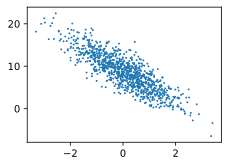

In [5]:
set_figsize()
plt.scatter(features[:, 1].asnumpy(), lables.asnumpy(), 1)
plt.show()

In [6]:
def data_iter(batch_size, features, lables):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)

    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), lables.take(j)

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, lables):
    print(X, y)
    break


[[ 0.5625079  -0.6737813 ]
 [ 0.42678928  1.1760476 ]
 [-1.0747732  -0.15313894]
 [ 1.0843554  -0.89467025]
 [ 0.2963081   0.8711869 ]
 [-0.19384152  0.8636369 ]
 [-0.42326602 -0.60970175]
 [ 0.73648626  0.5670942 ]
 [ 0.00389364  1.1413413 ]
 [-0.16185044  0.72164685]]
<NDArray 10x2 @cpu(0)> 
[11.798925   5.719807   8.220574  13.677005   6.3882756  6.9151316
 10.111475   7.1306343  4.01037    6.1861424]
<NDArray 10 @cpu(0)>


In [8]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [9]:
w.attach_grad()
b.attach_grad()

In [10]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [11]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, lables):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), lables)
    print("epoch %d, loss %f" % (epoch + 1, train_l.mean().asnumpy()))
    
    
    

epoch 1, loss 0.620431
epoch 2, loss 0.506138
epoch 3, loss 0.503036
epoch 4, loss 0.502320
epoch 5, loss 0.501919
epoch 6, loss 0.502035
epoch 7, loss 0.503268
epoch 8, loss 0.502592
epoch 9, loss 0.501859
epoch 10, loss 0.501656


In [12]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    with autograd.record():
        l = loss(net(features, w, b), y)
    l.backward()
    sgd([w, b], lr, num_examples)
    train_l = loss(net(features, w, b), lables)
    print("epoch %d, loss %f" % (epoch + 1, train_l.mean().asnumpy()))  

MXNetError: [12:01:17] /tmp/build/80754af9/libmxnet_1564766659613/work/src/ndarray/ndarray.cc:238: Check failed: shape_.Size() >= shape.Size() (10 vs. 1000) : NDArray.Reshape: target shape size is larger current shape
Stack trace:
  [bt] (0) /home/allen/.anaconda3/envs/ai/lib/python3.7/site-packages/mxnet/libmxnet.so(+0x38e1c4) [0x7f02f12981c4]
  [bt] (1) /home/allen/.anaconda3/envs/ai/lib/python3.7/site-packages/mxnet/libmxnet.so(mxnet::NDArray::Reshape(mxnet::TShape const&) const+0x218) [0x7f02f14fb688]
  [bt] (2) /home/allen/.anaconda3/envs/ai/lib/python3.7/site-packages/mxnet/libmxnet.so(mxnet::NDArray::ReshapeWithRecord(mxnet::TShape const&)+0x36) [0x7f02f1520906]
  [bt] (3) /home/allen/.anaconda3/envs/ai/lib/python3.7/site-packages/mxnet/libmxnet.so(MXNDArrayReshape64+0x1c6) [0x7f02f12a9506]
  [bt] (4) /home/allen/.anaconda3/envs/ai/lib/python3.7/lib-dynload/../../libffi.so.6(ffi_call_unix64+0x4c) [0x7f03274c0ec0]
  [bt] (5) /home/allen/.anaconda3/envs/ai/lib/python3.7/lib-dynload/../../libffi.so.6(ffi_call+0x22d) [0x7f03274c087d]
  [bt] (6) /home/allen/.anaconda3/envs/ai/lib/python3.7/lib-dynload/_ctypes.cpython-37m-x86_64-linux-gnu.so(_ctypes_callproc+0x2ce) [0x7f03276d601e]
  [bt] (7) /home/allen/.anaconda3/envs/ai/lib/python3.7/lib-dynload/_ctypes.cpython-37m-x86_64-linux-gnu.so(+0x12a54) [0x7f03276d6a54]
  [bt] (8) /home/allen/.anaconda3/envs/ai/bin/python(_PyObject_FastCallKeywords+0x49b) [0x55b2e8fa019b]



In [ ]:
print(true_w, w)
print(true_b, b)